In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Checkpoints - Part 1

## Checkpoint 1: Data Cleaning 1

Load the companies and rounds data

In [3]:
# companies = pd.read_csv("companies.csv", engine='python', )
# rounds = pd.read_csv("rounds2.csv", engine='python')

In [4]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
companies["permalink"] = companies["permalink"].str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'replace')
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
#Unique companies are present in rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
len(rounds2['company_permalink'].unique())

66368

In [8]:
rounds2['company_permalink'].str.lower().describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [9]:
companies['permalink'] = companies['permalink'].str.lower()
len(companies['permalink'].unique())

66368

### Merging the two dataframes

In [10]:
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

In [11]:
len(master_frame.index)

114949

In [12]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     74
name                          75
homepage_url                6200
category_list               3461
status                        74
country_code                8711
state_code                 10977
region                     10200
city                       10197
founded_at                 20562
dtype: int64

### Data Cleaning Since we are going to use master_frame from here

#### Dropping unnecessary columns

We are removing the unwanted columns, such as funding_round_code, funding_round_permalink, etc. . . Since they are not useful in this case.

In [13]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url', 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

#### Null values as percentage

In [14]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.07
category_list          3.01
country_code           7.58
dtype: float64

Still there are null values

In [15]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [16]:
master_frame = master_frame[~(master_frame['country_code'].isnull())]

In [17]:
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [18]:
(len(master_frame.index)/114949)

0.7699675508268884

## Checkpoint 2: Funding Type Analysis

### Observe unique funding_round_type

In [19]:
master_frame.funding_round_type.value_counts()

venture                  47804
seed                     21087
debt_financing            6506
angel                     4400
grant                     1935
private_equity            1820
undisclosed               1344
convertible_note          1317
equity_crowdfunding       1127
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

### Retaining the required data(venture, angel, seed, and private equity)

In [20]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                | (master_frame['funding_round_type'] == 'seed')
                | (master_frame['funding_round_type'] == 'angel')
                | (master_frame['funding_round_type'] == 'private_equity')]

In [21]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


### Converting raised_amount_usd to  1000000$

In [22]:
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,0.043360,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


In [23]:
for_Spark_Funds = master_frame

### Avarage Investment

In [24]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

### As Spark funds wants to invest between 5 to 15 million USD per investment round, the suitable invetment type is venture

In [25]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

# Checkpoints - Part 2

## Checkpoint 3: Country Analysis

In [26]:
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')

In [27]:
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)

In [28]:
top9 = top9.iloc[:9, ]

In [29]:
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7208.456960
ISR,6854.350477
DEU,6305.521981
JPN,3167.647127


### top three English-speaking countries in the data frame top9 and retaining them only

In [30]:
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

## Checkpoint 4: Sector Analysis 1

### Extract the primary sector of each category list from the category_list column

In [31]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps|Cable|Distribution|Software,USA


In [32]:
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [33]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA


###  Map each primary sector to one of the eight main sectors

### Saving mapping.csv file as df

In [34]:
mapping = pd.read_csv('./mapping.csv')

In [35]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [36]:
mapping.category_list.value_counts()

Coupons                         1
Enterprise Resource Planning    1
Hardware                        1
Internet Service Providers      1
Farmers Market                  1
                               ..
Alumni                          1
Private School                  1
VoIP                            1
Chat                            1
Enterprise Search               1
Name: category_list, Length: 687, dtype: int64

In [37]:
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [38]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising'])

In [39]:
mapping.head()

,category_list,variable,value
0,NaN,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0


In [40]:
mapping = mapping[~(mapping.value == 0)]

mapping = mapping.drop('value', axis = 1)

In [41]:
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [42]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


### List of primary sectors which have no main sectors in the master_frame

In [43]:
master_frame[master_frame.main_sector.isnull()].category_list.unique()

array(['Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Enterprise 2.0',
       'Adaptive Equipment', 'Racing', 'Specialty Retail',
       'Biotechnology and Semiconductor', 'Rapidly Expanding',
       'Navigation', 'Product Search', 'GreenTech', 'Retirement'],
      dtype=object)

### total number of data wich are null in main_sector

In [44]:
master_frame.main_sector.isnull().sum()

165

In [45]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]

In [46]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"


In [47]:
len(master_frame.index)

38638

## Checkpoint 5: Sector Analysis 2

### D1

In [48]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [49]:
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
3,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging"
17,/organization/128-technology,venture,11.999347,128 Technology,Service Providers,USA,Others
20,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing
21,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing


In [50]:
D1_find = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

In [51]:
D1 = D1.merge(D1_find, how='left', on ='main_sector')
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13959.567428,1582
2,/organization/128-technology,venture,11.999347,128 Technology,Service Providers,USA,Others,26321.007002,2950
3,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
4,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799


### D2

In [52]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [53]:
D2_find = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

In [54]:
D2 = D2.merge(D2_find, how='left', on ='main_sector')
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,venture,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133
1,/organization/7digital,venture,8.468328,7digital,Content Creators,GBR,Entertainment,482.784687,56
2,/organization/7digital,venture,10.000000,7digital,Content Creators,GBR,Entertainment,482.784687,56
3,/organization/90min,venture,15.000000,90min,Media,GBR,Entertainment,482.784687,56
4,/organization/90min,venture,5.800000,90min,Media,GBR,Entertainment,482.784687,56


### D3

In [55]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]

In [56]:
D3_find = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})

In [57]:
D3 = D3.merge(D3_find, how='left', on ='main_sector')
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Entertainment,280.830000,33
1,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,IND,Others,1013.409507,110
2,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60
3,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33
4,/organization/agile,venture,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60


### Total count

In [58]:
D1.raised_amount_usd.count()

12012

In [59]:
D2.raised_amount_usd.count()

619

In [60]:
D3.raised_amount_usd.count()

328

### Toal amount

In [61]:
D1.raised_amount_usd.sum()

107318.29466400002

In [62]:
D2.raised_amount_usd.sum()

5365.2283

In [63]:
D3.raised_amount_usd.sum()

2949.5436019999997

In [64]:
D1_find

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1454.104361         167
Cleantech / Semiconductors                   21206.628192        2300
Entertainment                                 5099.197982         591
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
News, Search and Messaging                   13959.567428        1582
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714

In [65]:
D2_find

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            167.051565          16
Cleantech / Semiconductors                    1150.139665         128
Entertainment                                  482.784687          56
Health                                         214.537510          24
Manufacturing                                  361.940335          42
News, Search and Messaging                     615.746235          73
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133

In [66]:
D3_find

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  280.830000          33
Health                                         167.740000          19
Manufacturing                                  200.900000          21
News, Search and Messaging                     433.834545          52
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60

### For the top sector count-wise, which company received the highest investment - USA

In [67]:
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/virtustream,64.300000
/organization/capella,54.968051
/organization/airtight-networks,54.201907
/organization/decarta,52.100000
/organization/black-duck-software,51.000000


### For the top sector count-wise, which company received the highest investment - GBR

In [68]:
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.000000
/organization/sensage,36.250000
/organization/enigmatic,32.500000
/organization/silverrail-technologies,29.000000
/organization/opencloud,27.972766


### For the top sector count-wise, which company received the highest investment - IND

In [69]:
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39.0
/organization/myntra,38.0
/organization/commonfloor,32.9
/organization/pepperfry-com,28.0
/organization/itzcash-card-ltd,25.0


###  For the second-best sector count-wise, which company received the highest investment _ USA

In [70]:
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/shotspotter,67.933006
/organization/demandbase,63.000000
/organization/intacct,61.800000
/organization/netbase,60.600000
/organization/lotame,59.700000


###  For the second-best sector count-wise, which company received the highest investment - GBR

In [71]:
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37.500000
/organization/mythings,34.000000
/organization/zopa,32.900000
/organization/imagini,28.550000
/organization/marketinvoice,25.553007


###  For the second-best sector count-wise, which company received the highest investment  - IND

In [72]:
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
company.head()

,raised_amount_usd
company_permalink,
/organization/gupshup-technology-india-pvt-ltd,33.0
/organization/imimobile,23.0
/organization/sms-gupshup,22.0
/organization/roadrunnr,21.0
/organization/hike,21.0


## Checkpoint 6: Plots

### A plot showing the representative amount of investment in each funding type.

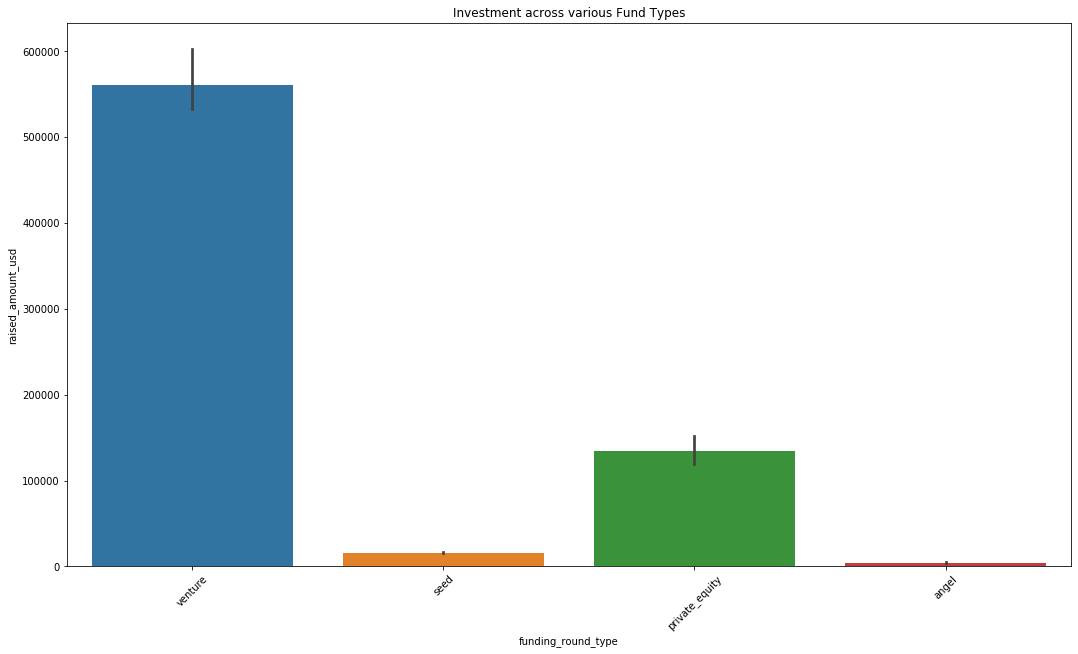

In [73]:
plt.figure(figsize = (18,10))
plt.title('Investment across various Fund Types')
sns.barplot(x='funding_round_type', y="raised_amount_usd", data=for_Spark_Funds, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

    ### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries

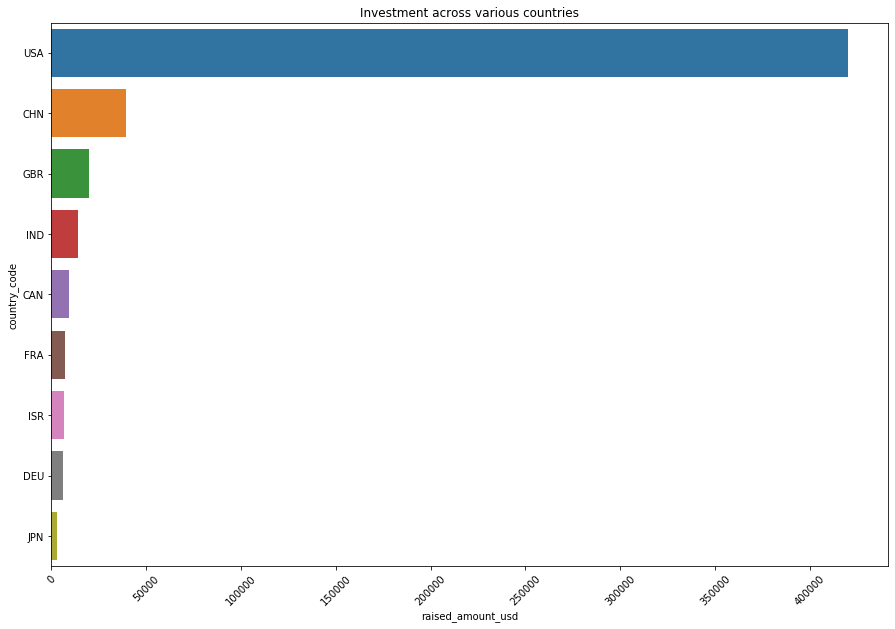

In [74]:
plt.figure(figsize = (15,10))
plt.title('Investment across various countries')
sns.barplot(y=top9.index, x="raised_amount_usd", data=top9, estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 

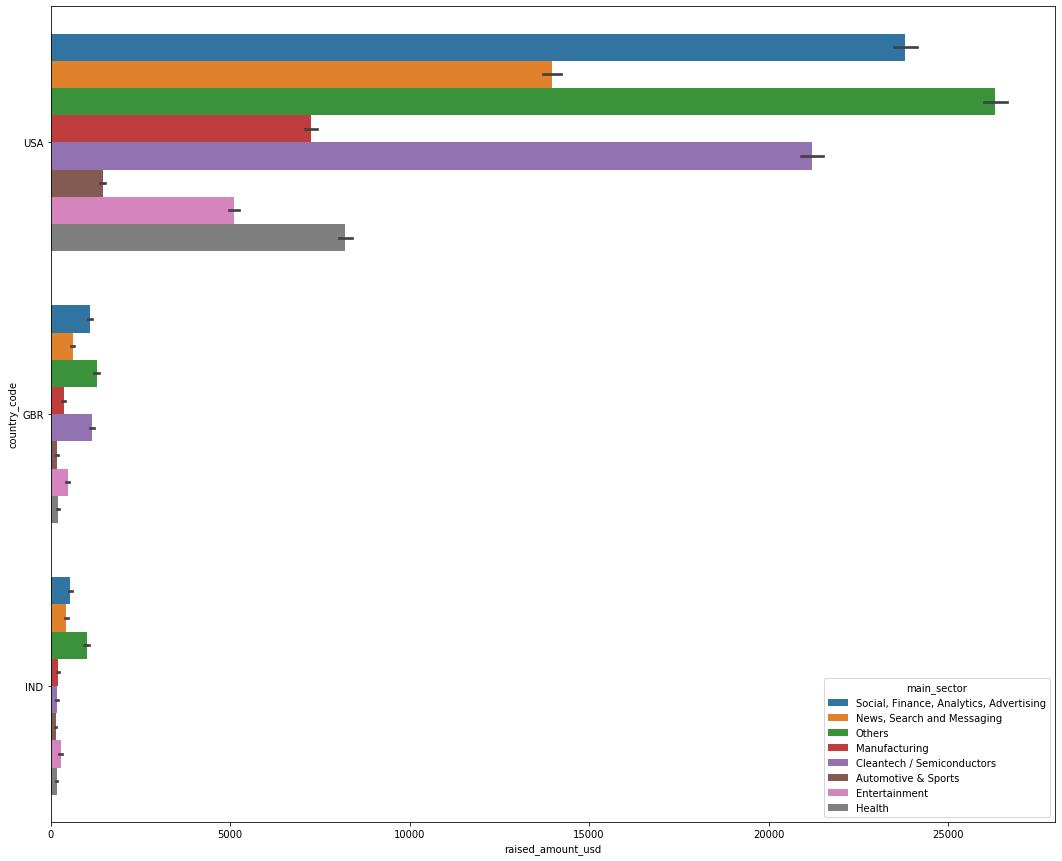

In [75]:
top3 = pd.concat([D1, D2, D3])
plt.figure(figsize=(18, 15))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top3, estimator=np.sum)
plt.show()

# Analysis

### Funding type - Venture.
### Countries - USA, Britain and India, respectively.
### Top two sectors to invest in are - Others and Social, Finance, Analytics, Advertising.